<a href="https://colab.research.google.com/github/kgtestprojects/pythonprojectsc/blob/main/Project_2_ML_AllLife_Bank_Karthik_Garimella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 63.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Adding additional packages, as directed in the Project FAQ section

#Zipcode converter
!pip install uszipcode


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=879d90f0f98f2865d04198299bd947d206af41c66de1386164c44fcd565a76d7
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites


## Loading the dataset

In [ ]:
# Importing necessary file to begin data analysis.
# Due to my drive settings, I prefer to upload the file from my laptop
from google.colab import files

# Open file dialog to upload a file
uploaded = files.upload()

Saving Loan_Modelling (1).csv to Loan_Modelling (1).csv


In [ ]:
#Move contents of file to a dataframe
df = pd.read_csv('Loan_Modelling (1).csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
#Checking the first 10 rows
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
#Number of rows and columns
df.shape

(5000, 14)

In [ ]:
#Datatypes of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Statistical Summary for all values, transposed for easier analysis
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Check for missing values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


**Observations:**

1. The dataset provided contains 5000 rows of data, and 14 columns.
2. The datatype for all columns is numerical (int or float). No null values observed.
3. All boleen flags are within range (0,1) - Personal_Loan, Securities_Account, CD_Account, Online, CreditCard.
3. Some potential outliers observed (e.g. experience of -3 etc), which will be evaluated as a part of data preprossing.
4. Additionally, ZIPCode is coded as numerical and will be problematic. Will be addressed in the subsequent sections.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=0, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Univariate Analysis

# ID

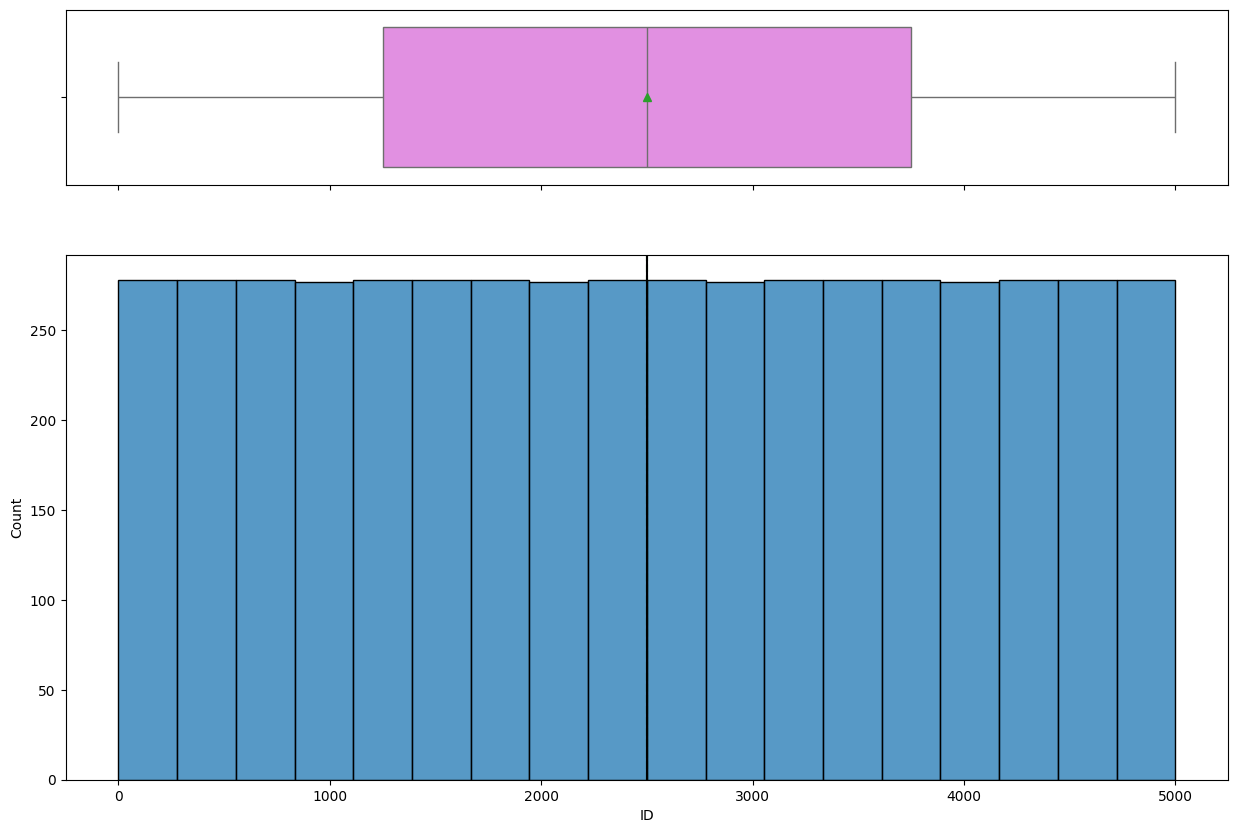

In [ ]:
histogram_boxplot(df, "ID")

In [ ]:
#check if ID is repeated
vc_id = df["ID"].value_counts()

In [ ]:
vc_id[vc_id > 1]

,count
ID,


**Observation:** ID is not repeated, and sequential.

# Age

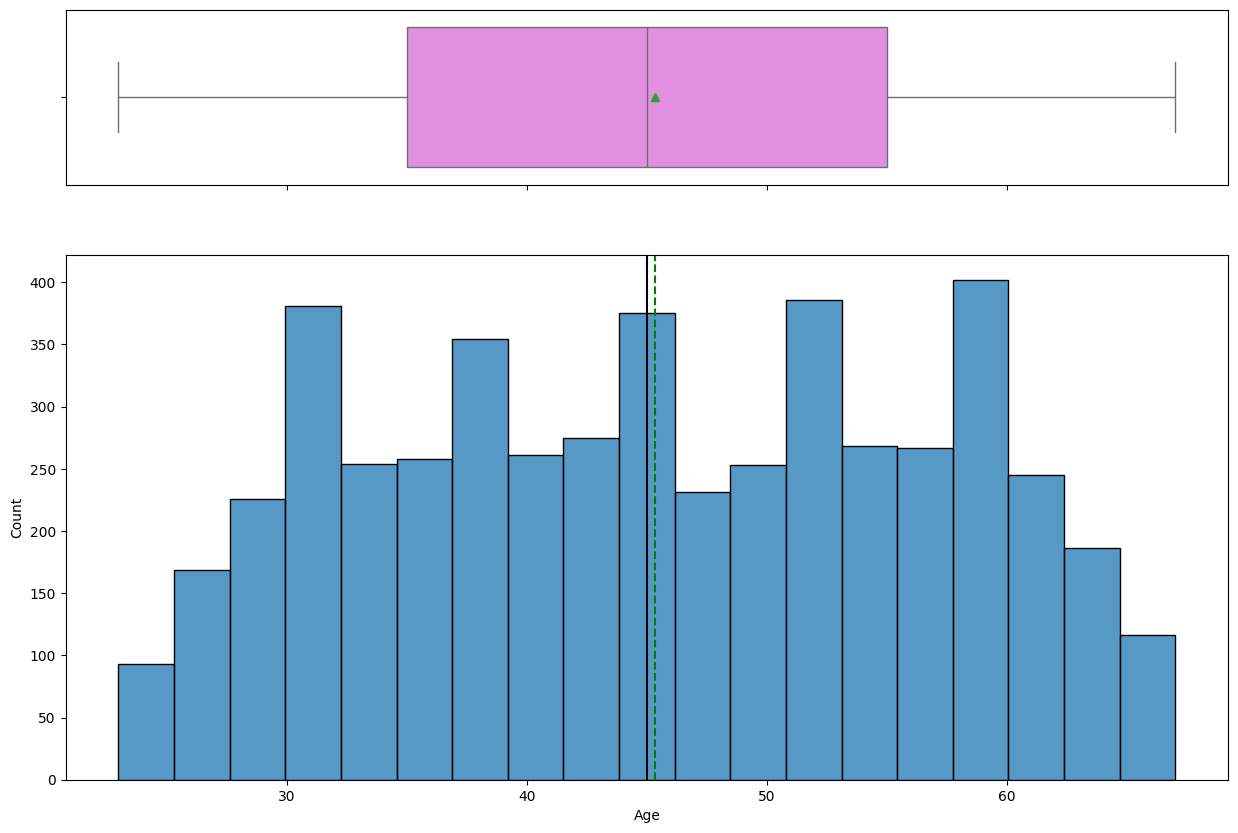

In [ ]:
histogram_boxplot(df, "Age")

# Experience

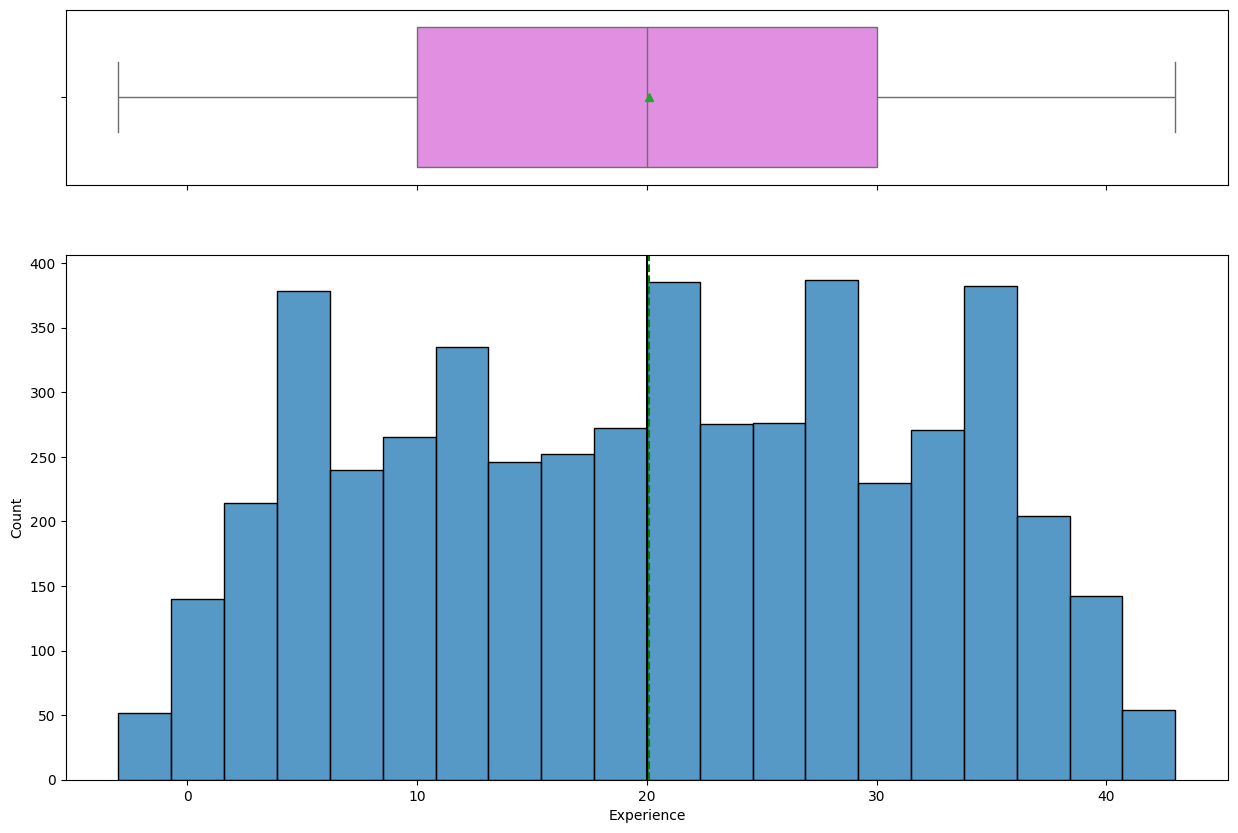

In [ ]:
histogram_boxplot(df, "Experience")

In [ ]:
#Finding data with negetive experinence.
neg_exp = df.loc[df["Experience"] < 0]
neg_exp.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


**Observation:**

1. Average of 20yrs experience.
2. As previously discussed around negative experience, 52 rows, and all in the age group of 23-29, so likely still continuing education (and possibly years pending graduation).


# Income

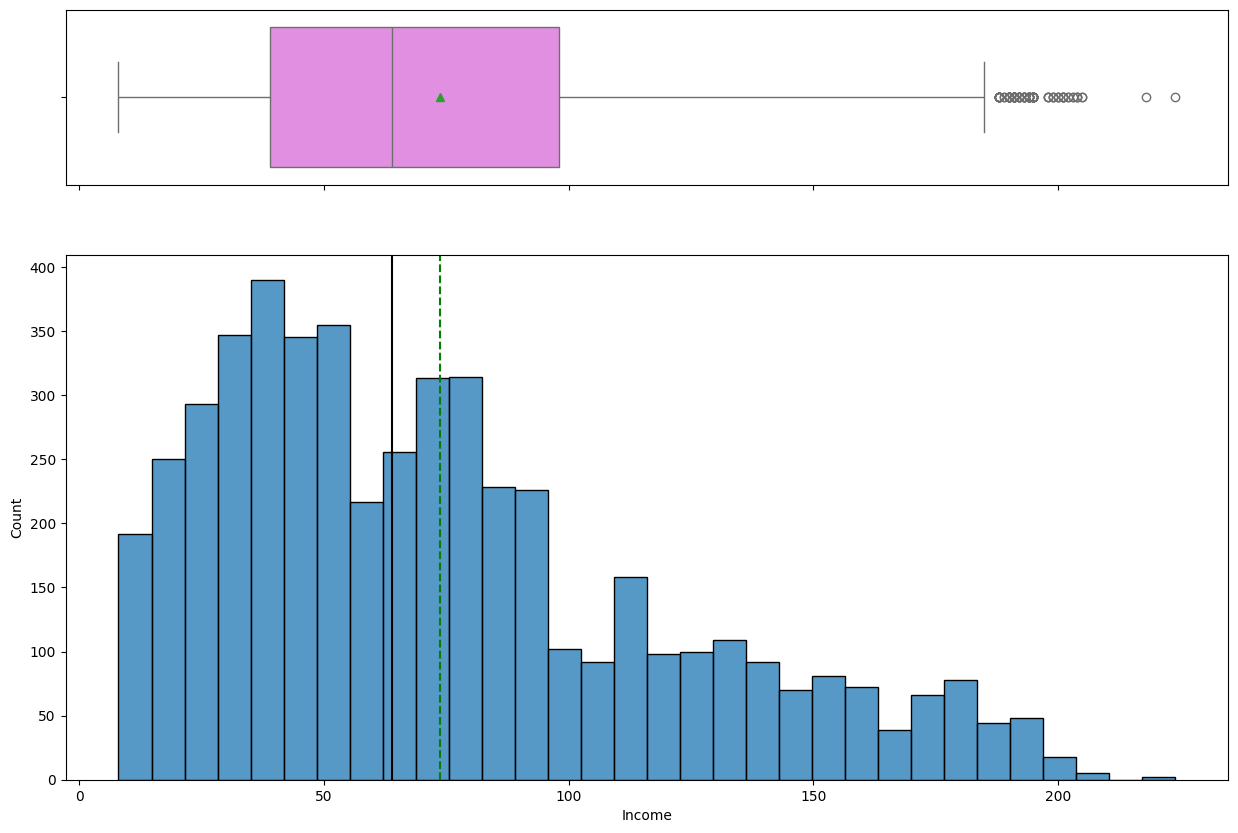

In [ ]:
histogram_boxplot(df, "Income")

**Observations:**
1. Income data is right skewed, with outliers in the upper quartile.
2. Explainable as some customers have high incomes.

# ZIPCode

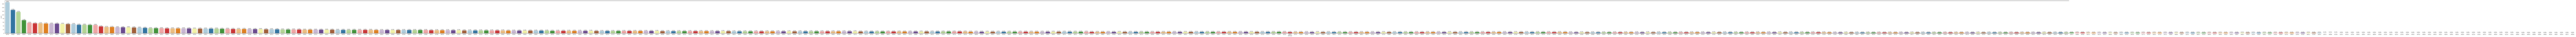

In [ ]:
# Understanding ZIP code patterns
labeled_barplot(df, "ZIPCode", perc=True)

**Observation:** Clearly, a lot of ZIP codes in the data, and we'll need a better mechanism to group this data.

# Family

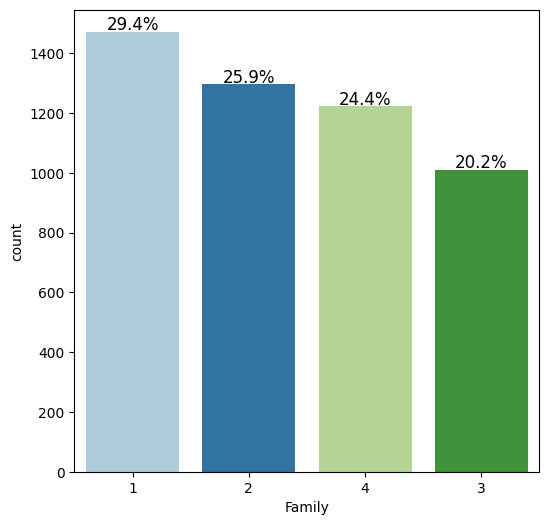

In [ ]:
#While a numerical variable, treating as categorical to understand family size.
labeled_barplot(df, "Family", perc=True)


**Observations:**

1. Approximately, a third of the customers are single, and another quarter are couples.
2. 44% of the families have more than 2 members.

# CCAvg

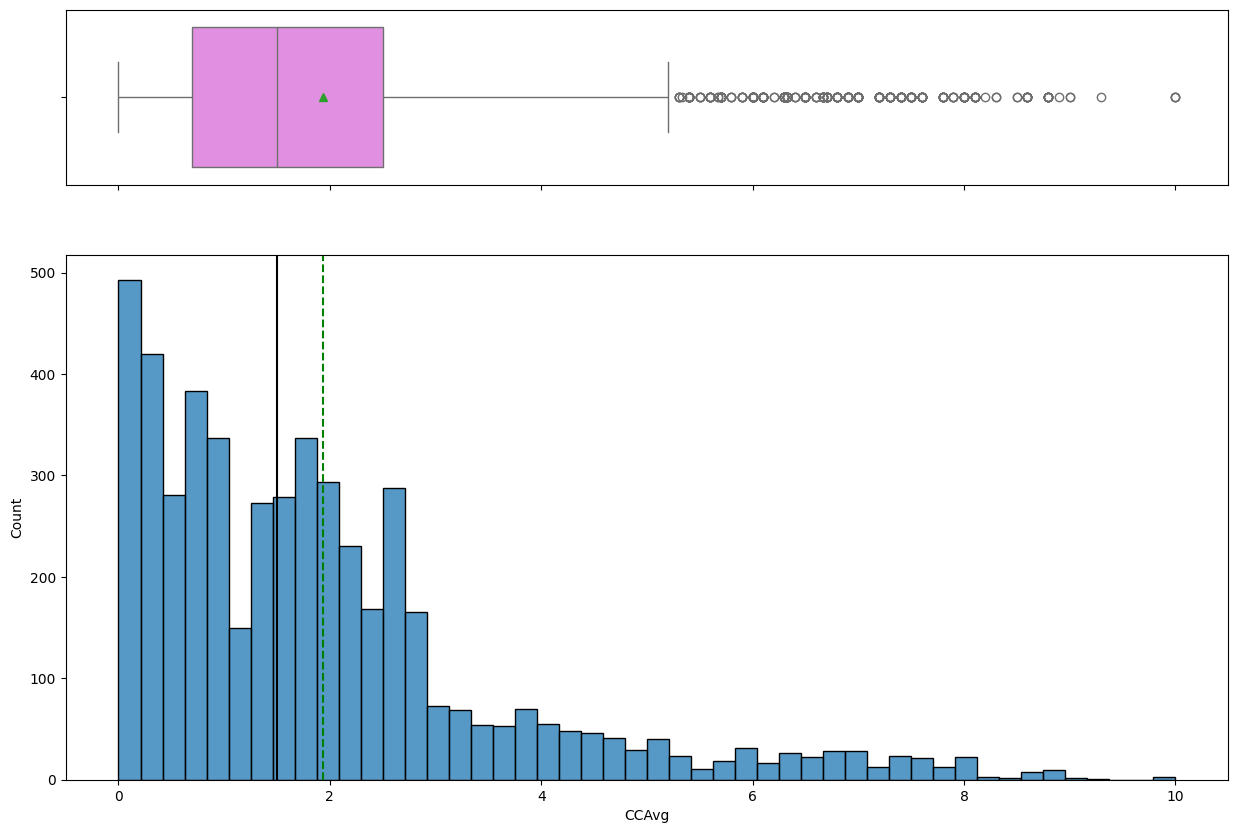

In [ ]:
histogram_boxplot(df, "CCAvg")

**Observations:** Right skewed, like income, with outliers in the upper quartile for customers w/ large credit card spending.

# Education

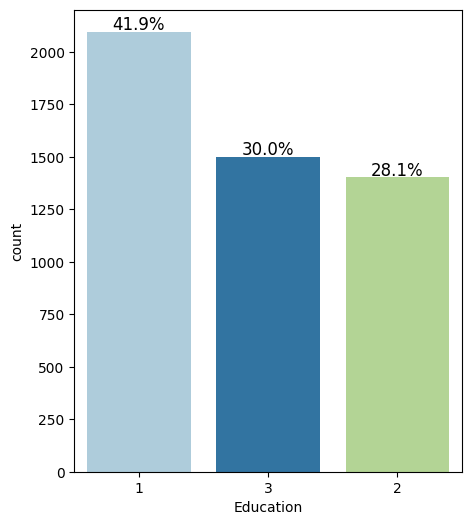

In [ ]:
#While a numerical variable, treating as categorical to understand education levels for customers.
labeled_barplot(df, "Education", perc=True)

**Observations:**
1. Largest category is customers w/ Undergrad (~41.9%).
2. Roughly similar makeup (30 vs 28%) of customers with Advanced/Professional and Graduate degrees, respectively.
3. **interesting observation** - There are no customers without any degree.

# Mortgage

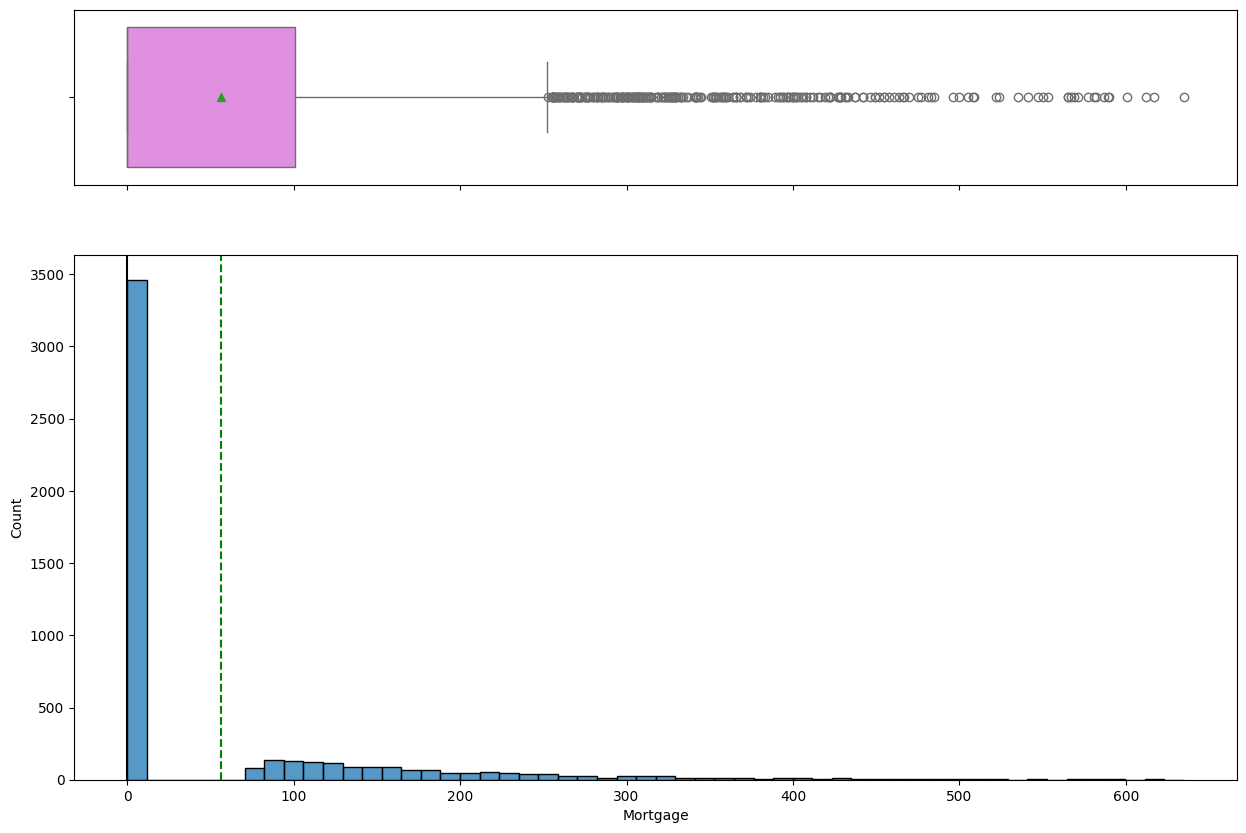

In [ ]:
histogram_boxplot(df, "Mortgage")

**Observations:**
1. Approx ~3500 customers with no mortgate (or available to us).
2. Signifcantly right skewed data (note that the large number of customers with no mortgage dragging the mean and median data down).

# Mortgage (but only for customers with a mortgage)

In [ ]:
# Filtering down to customers with a mortgage
mortgate_only = df[df["Mortgage"] > 0]

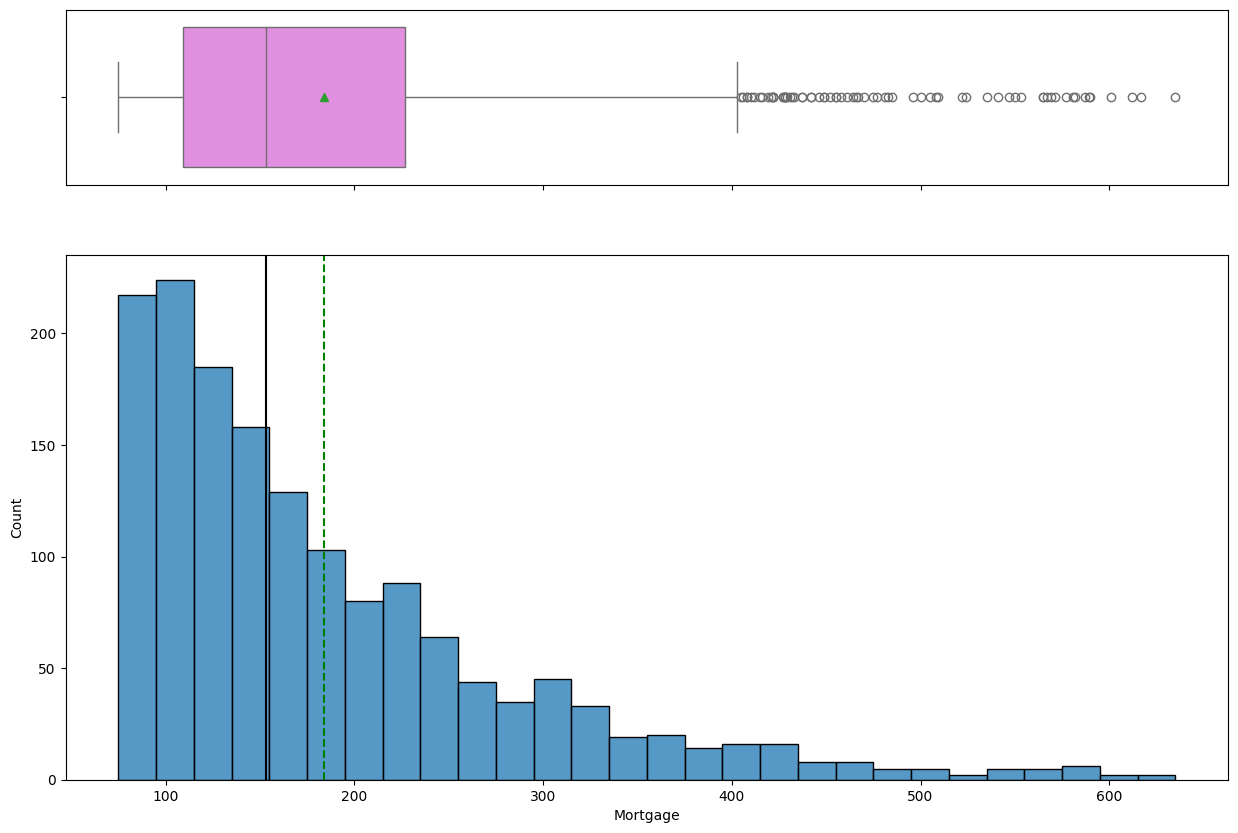

In [ ]:
#Performing data analysis on these customers for a better representation of mortgages
histogram_boxplot(mortgate_only, "Mortgage")

# Personal Loan

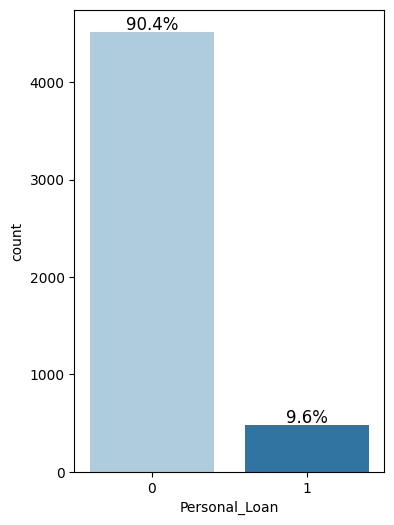

In [ ]:
#While a numerical variable, treating as categorical to understand customers who previously accepted a personal loan
labeled_barplot(df, "Personal_Loan", perc=True)

**Observation:** This matches the inital report that 9% of customers signed up for a personal loan. The dataset is representative.


# Securities Account

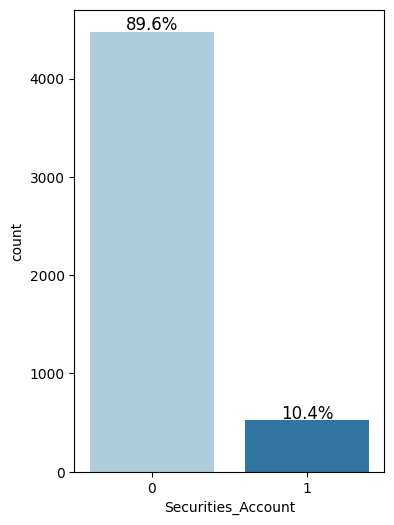

In [ ]:
#While a numerical variable, treating as categorical to understand customers who have a securities account.
labeled_barplot(df, "Securities_Account", perc=True)

**Observations:** 10% of customers have a securities account.

# CD_Account

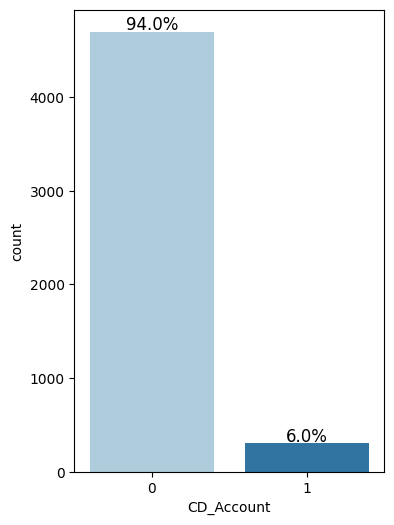

In [ ]:
#While a numerical variable, treating as categorical to understand customers who have a CD Account.
labeled_barplot(df, "CD_Account", perc=True)

**Observation:** 6% of customers have a CD account.

# Online

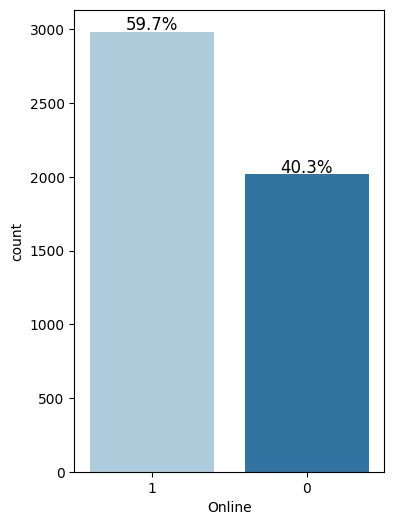

In [ ]:
#While a numerical variable, treating as categorical to understand customers who use online banking facilities.
labeled_barplot(df, "Online", perc=True)

**Observation:** A majority (~60%) of customers use online banking facilities.

# Credit Card

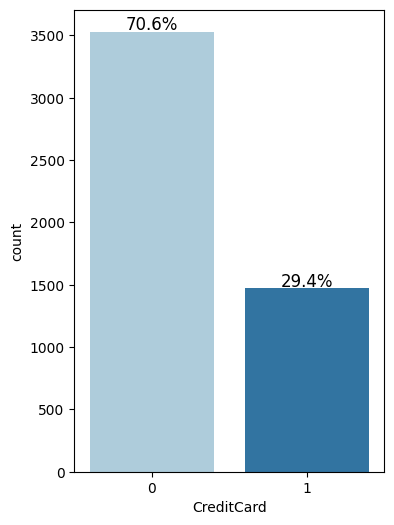

In [ ]:
#While a numerical variable, treating as categorical to understand customers who use other banks' credit cards
labeled_barplot(df, "CreditCard", perc=True)

**Observation:** About 30% of customers use credit cards issued by other banks.

# Bivariate Analysis

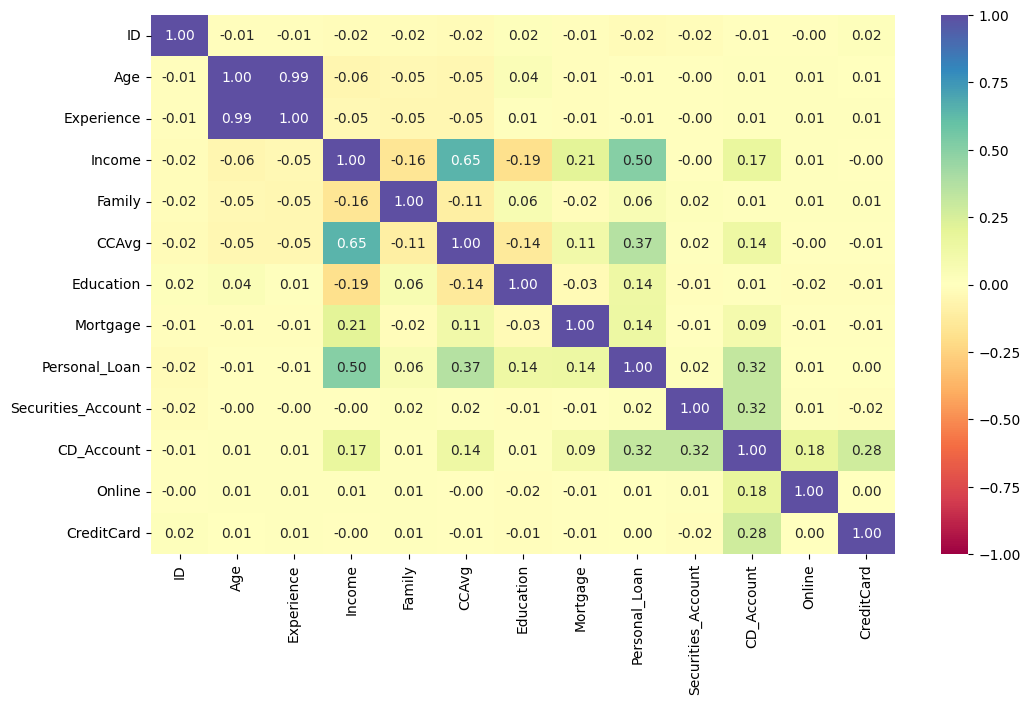

In [ ]:
#Performing an initial corelation analysis across all (but ZIP) to understand corelation across variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('ZIPCode')

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**

1. Expected corelation - Age and Experience are very strongly co-related, as expected.
2. Income and spending patterns - Seeing positive and resonable corelation (0.5+) between income and spending (CC Avg, Personal Loans).
3. Personal Loan Campaign - Seeing some positive corelation (0.3 - 0.5) for customers who accepted personal loans w/ income, average credit card spend, and CD Accounts. We'll dig into this further in the below sections.
4. Low corelation/unrelated - Not seeing singificant co-relation between Family Size, Education, Age/Experience with banking behavior patterns. Most of these patterns seem to be driven by other data points (see point 2 and 3).

# Income and Average Credit Card Spending

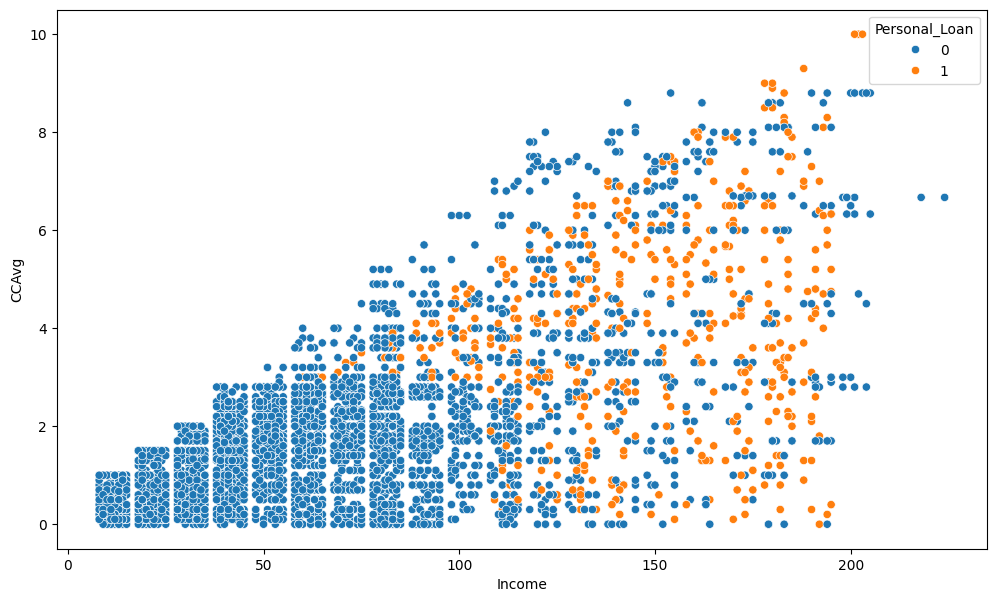

In [ ]:
#Scatterplot to understand corelation between Income and Credit card spending
#Adding a target variable of customers who accepted prior campaign
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="Income", y="CCAvg", hue="Personal_Loan")
plt.show()

# Income and Mortgage

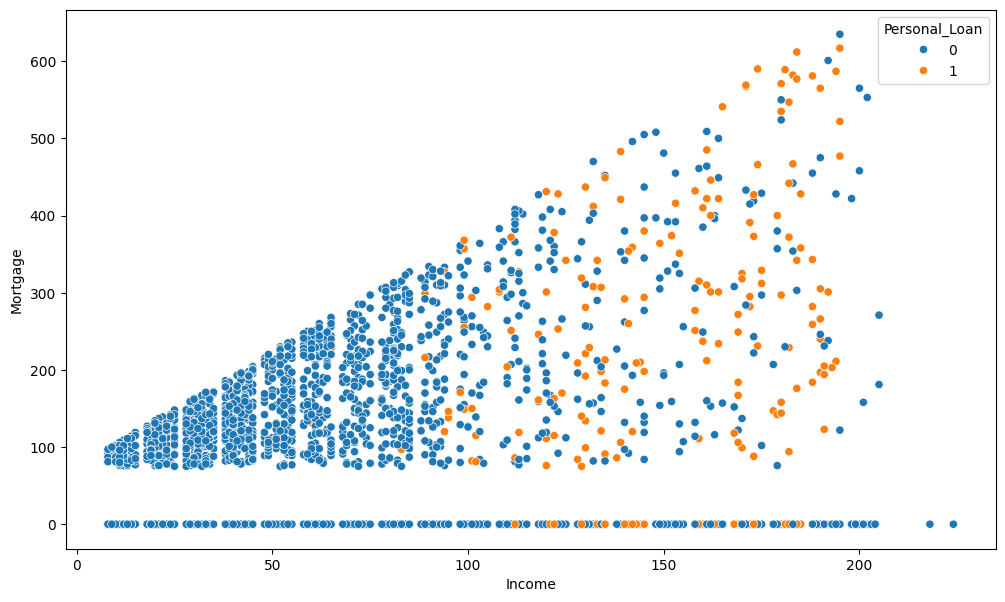

In [ ]:
#Scatterplot to understand corelation between Income and Credit card spending
#Adding a target variable of customers who accepted prior campaign
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="Income", y="Mortgage", hue="Personal_Loan")
plt.show()

#Income and Personal Loan

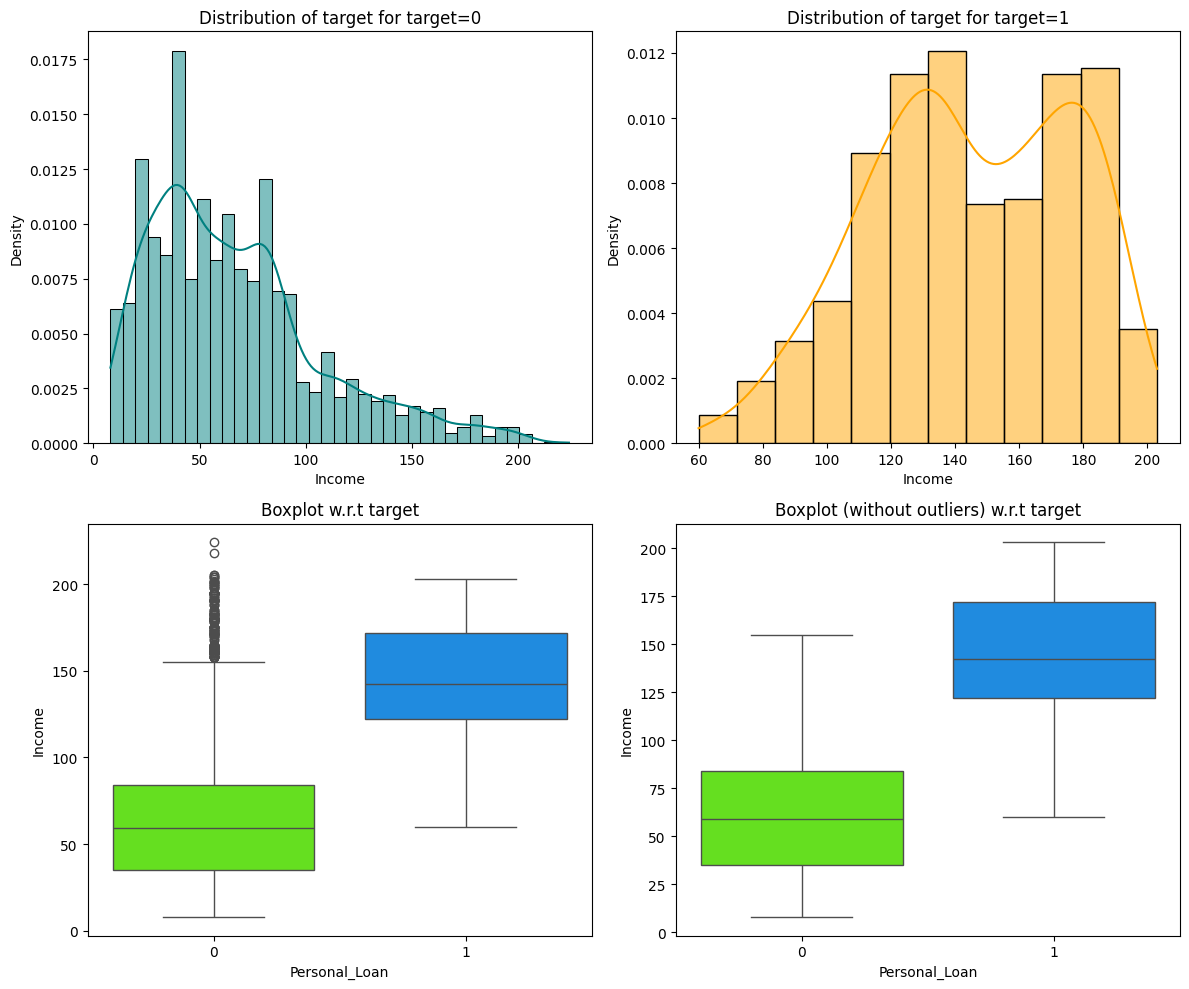

In [ ]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")


# Credit Card Spending and Personal Loan

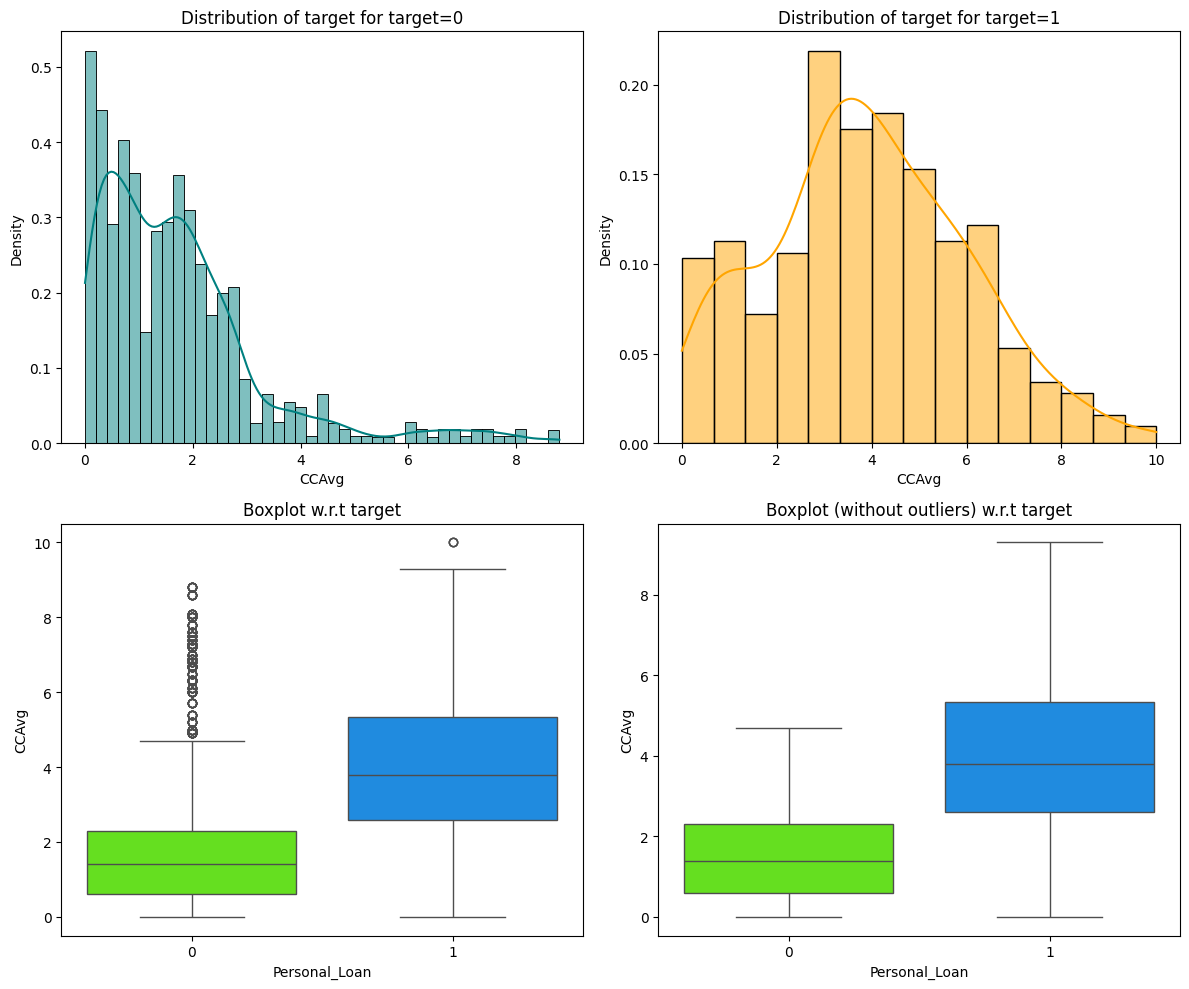

In [ ]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

# Mortgage (non-zero) and Personal Loan

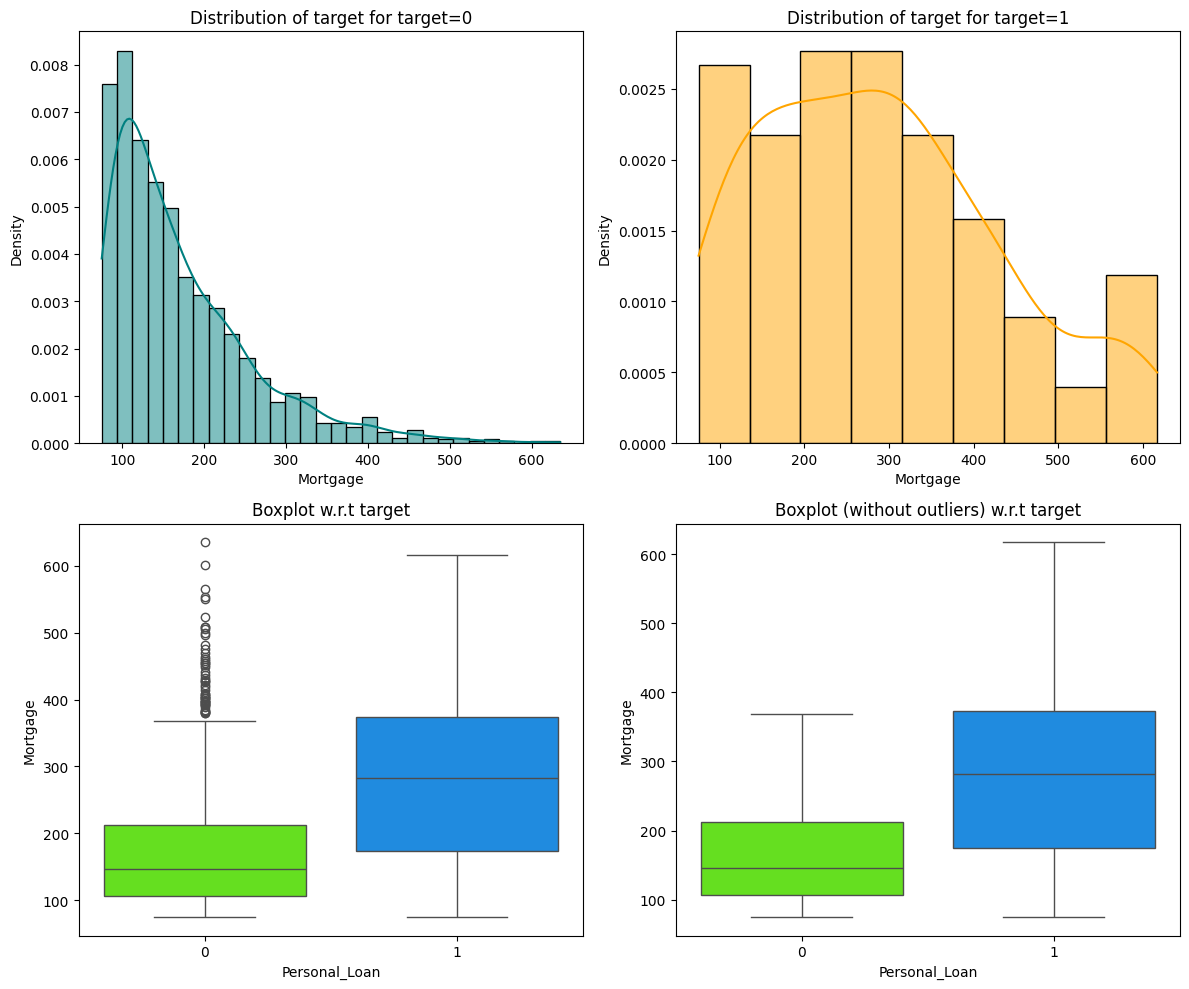

In [ ]:
#To avoid the skewing of data towards 0 considering the large number of customers without mortgage
#performing the below analysis only for customers with non-zero mortgage to get a better sense
distribution_plot_wrt_target(mortgate_only, "Mortgage", "Personal_Loan")

# Age and Personal Loan

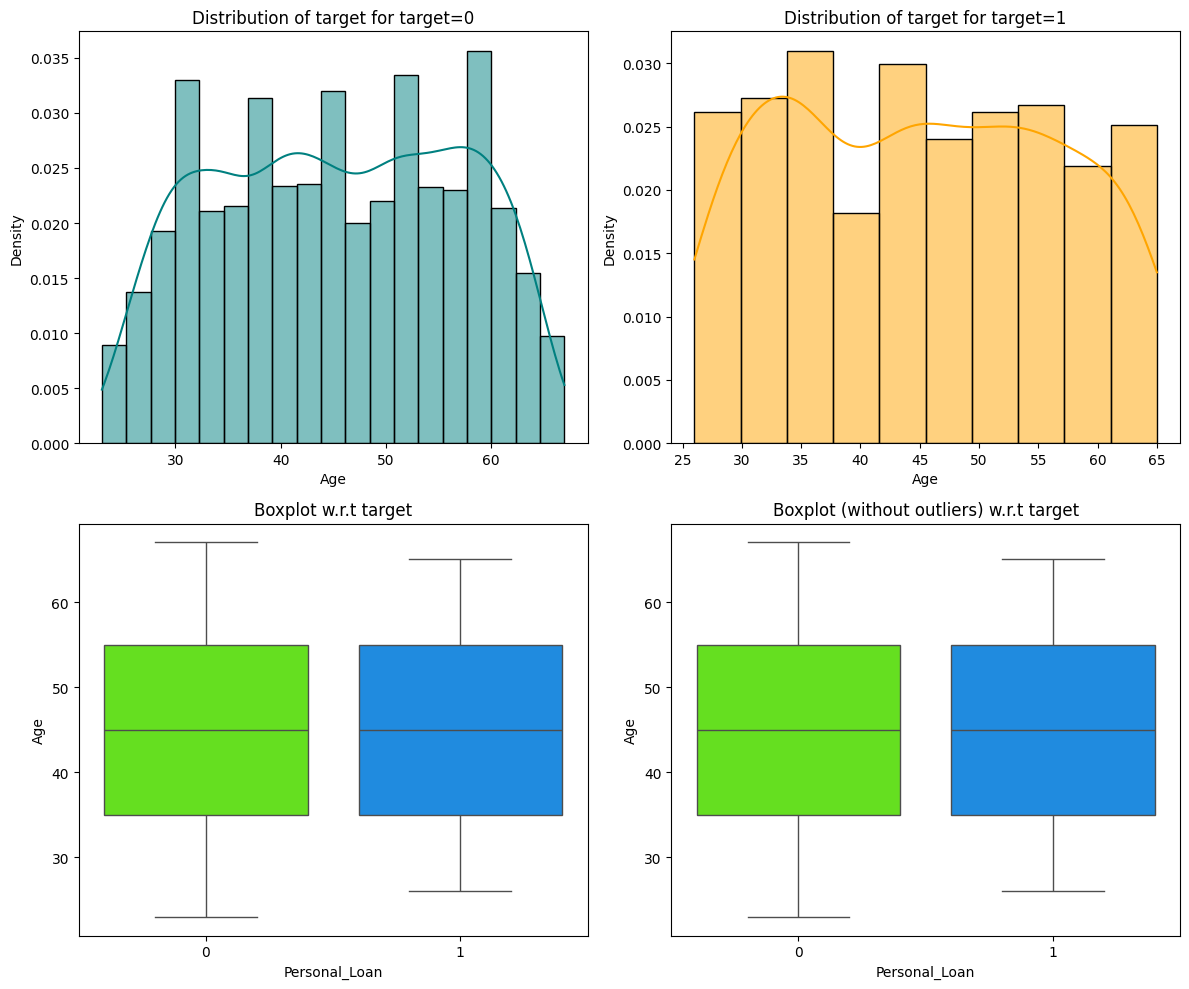

In [ ]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

# Education and Personal Loan

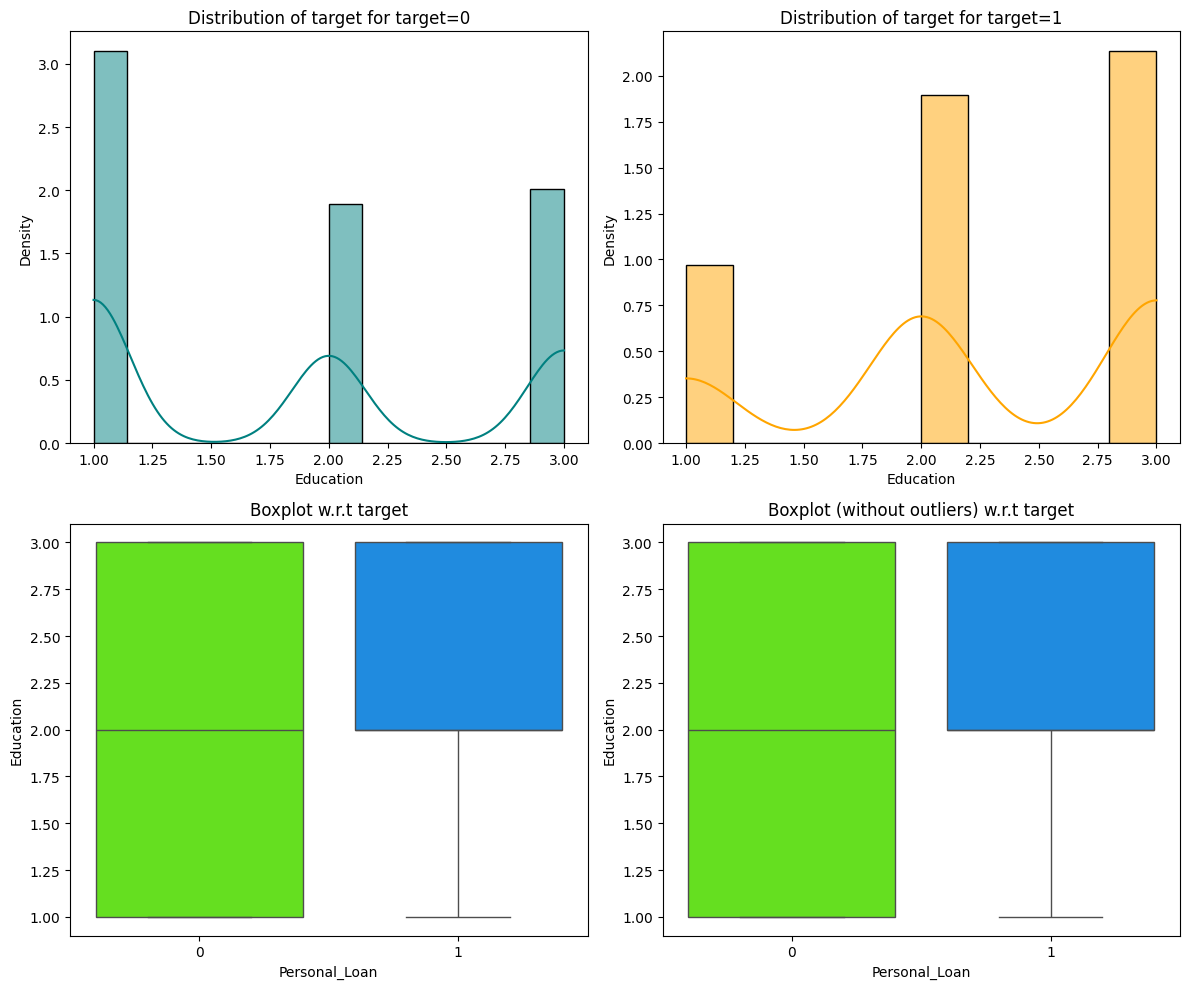

In [ ]:
distribution_plot_wrt_target(df, "Education", "Personal_Loan")

# Credit cards and Personal Loan

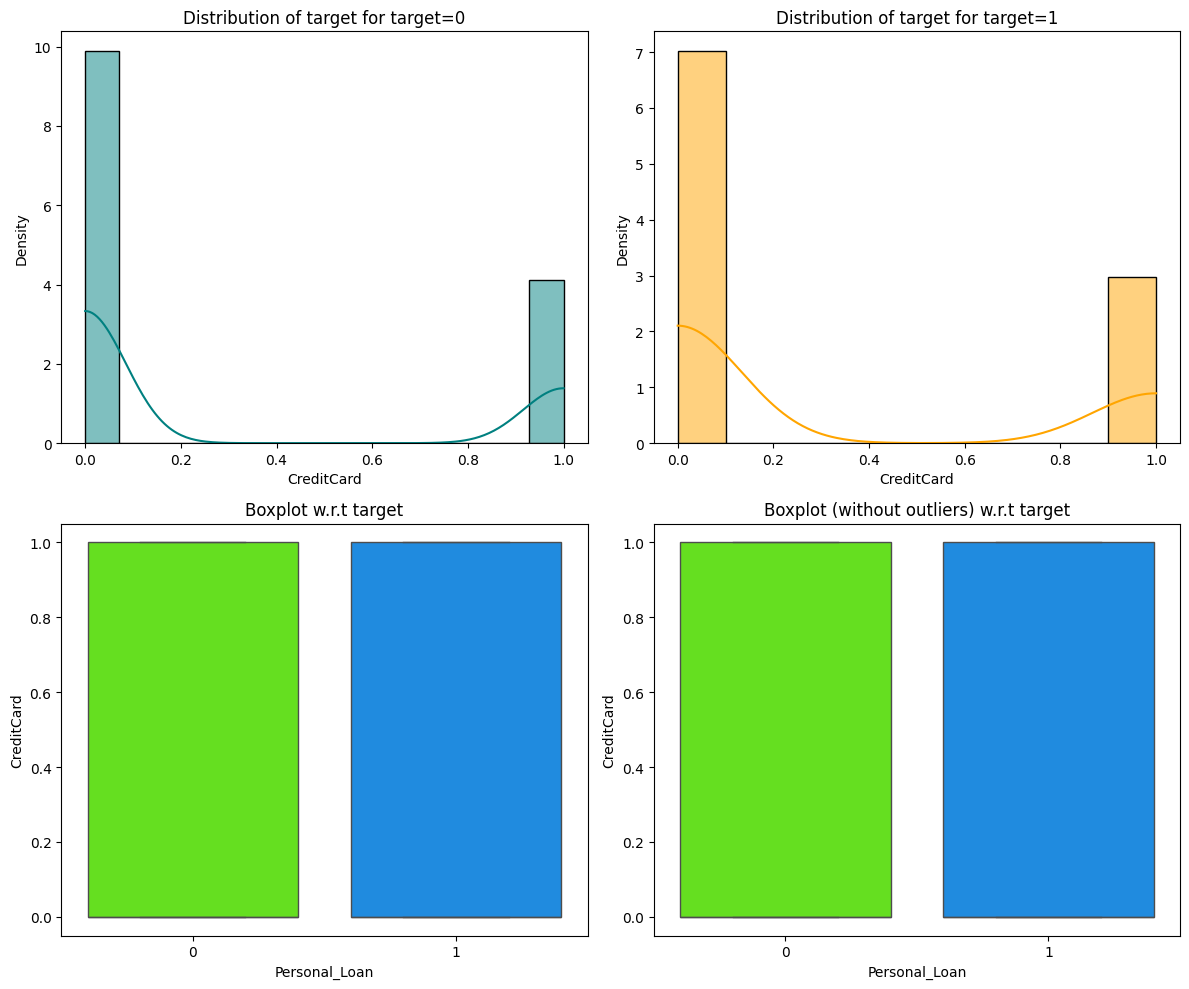

In [ ]:
distribution_plot_wrt_target(df, "CreditCard", "Personal_Loan")

# Credit Card Customers (CCAvg and CreditCard)

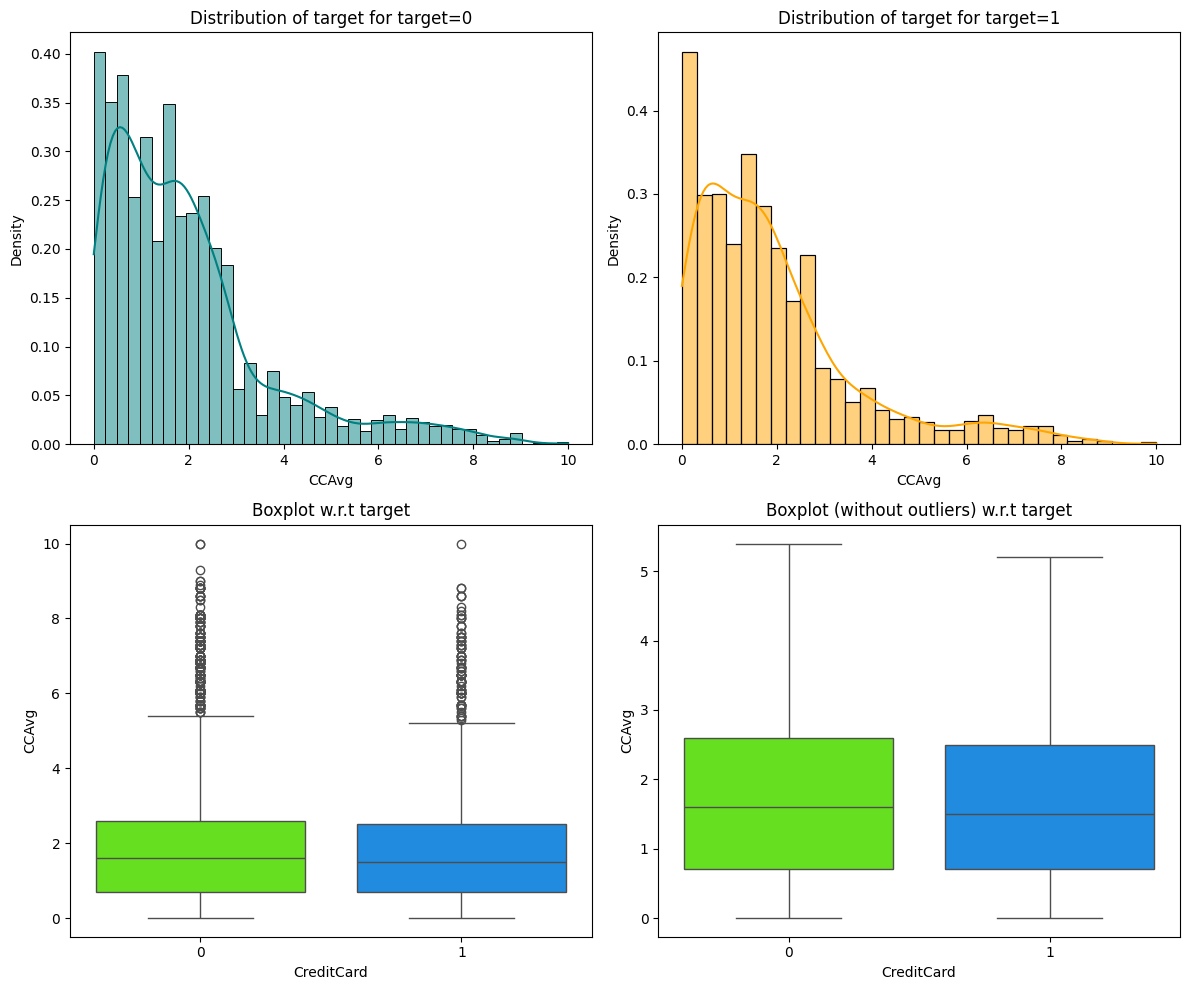

In [ ]:
distribution_plot_wrt_target(df, "CCAvg", "CreditCard")

In [ ]:
#Lets attempt to find the total population of customers with Credit Cards
#Either because they have a balance or they have a credit card with a different bank

cc_count = 0
for i in df.index:
    if df.loc[i, "CreditCard"] == 1:
        cc_count += 1
    elif df.loc[i, "CCAvg"] > 0:
        cc_count += 1
print("Estimated amount of customers with credit cards:", cc_count)

Estimated amount of customers with credit cards: 4922


# Summarized EDA Observations and Questions Answered

**1.	What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**
For the population of customers that had mortgages, max mortgage amounts had a strong co-relation with income. I'd consider this expected, since higher income leads to the ability to acquire a higher mortgage. That being said, not all high earners had high mortgages. Conversely, customers with lower incomes had strong upper bounds w.r.t mortgage.

**2. How many customers have credit cards?**
4922 customers are estimated to have credits cards. This was assessed by checking if they either had a CC spend or credit card with another bank. IMPORTANT: Customers with only ALL Life Bank CC but no spend on them would not be found with the dataset provided, and hence this is considered an estimate.

**3. What are the attributes that have a strong correlation with the target attribute (personal loan)?**
Based on the corelation matrix above, Income (0.5) has the highest corelation with Personal Loan campaign success.

**4. How does a customer's interest in purchasing a loan vary with their age?** No real co-relation with these attributes as seen from both the bivariate analysis and corelation matrix.

**5. How does a customer's interest in purchasing a loan vary with their education?** No real co-relation with these attributes as seen from both the bivariate analysis and corelation matrix.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

# Outlier Analysis

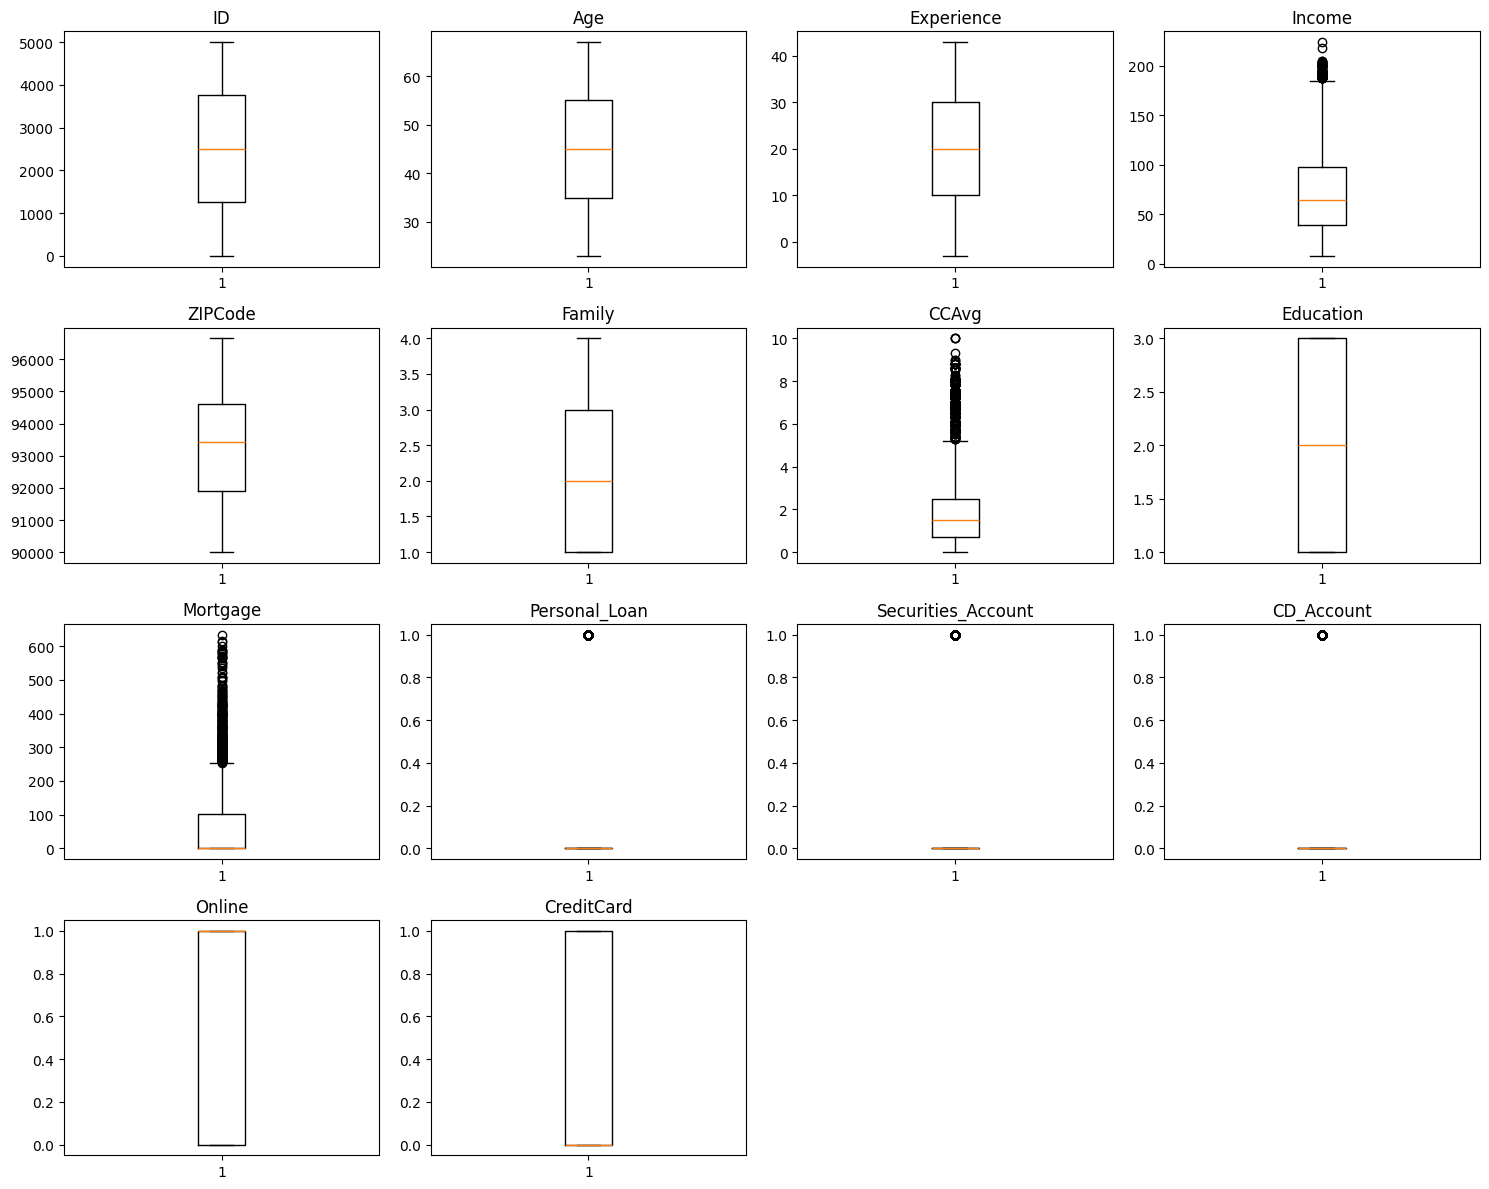

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:** Expected outliers with income, credit card spending, and mortgage amounts. As discussed earlier, we'll consider no treatment for the negative experience (assumption: considering this as years till graduation).

# Preparing data for modeling

In [ ]:
#Dropping the column for Personal Loan and moving it to a different Dataframe
X = df.drop("Personal_Loan", axis=1)
Y = df["Personal_Loan"]

#Since we have no categorical variables, no treamtment needed.

#Splitting data into train (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#Checking composition of training and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


**Observation:** Approx 9-10% personal loan conversion in both train and test data. Hence, good to proceed with the train and test data set.

## Model Building

*

In [ ]:
# Default decision tree
base_model = DecisionTreeClassifier(random_state=1)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Evaluating Accuracy w/ Training Data
y_pred_train = base_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
#Running base model w/ Test Data
y_pred = base_model.predict(X_test)

**Observation**: Built a default decision tree model. Additional ran the test data, and will be evaluating the model in the below section.

# Model Evaluation Criteria

In [ ]:
#Evlauating Accuracy w/ Test Data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9793333333333333


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1336   15]
 [  16  133]]


In [ ]:
#Precision, Recall, and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.90      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



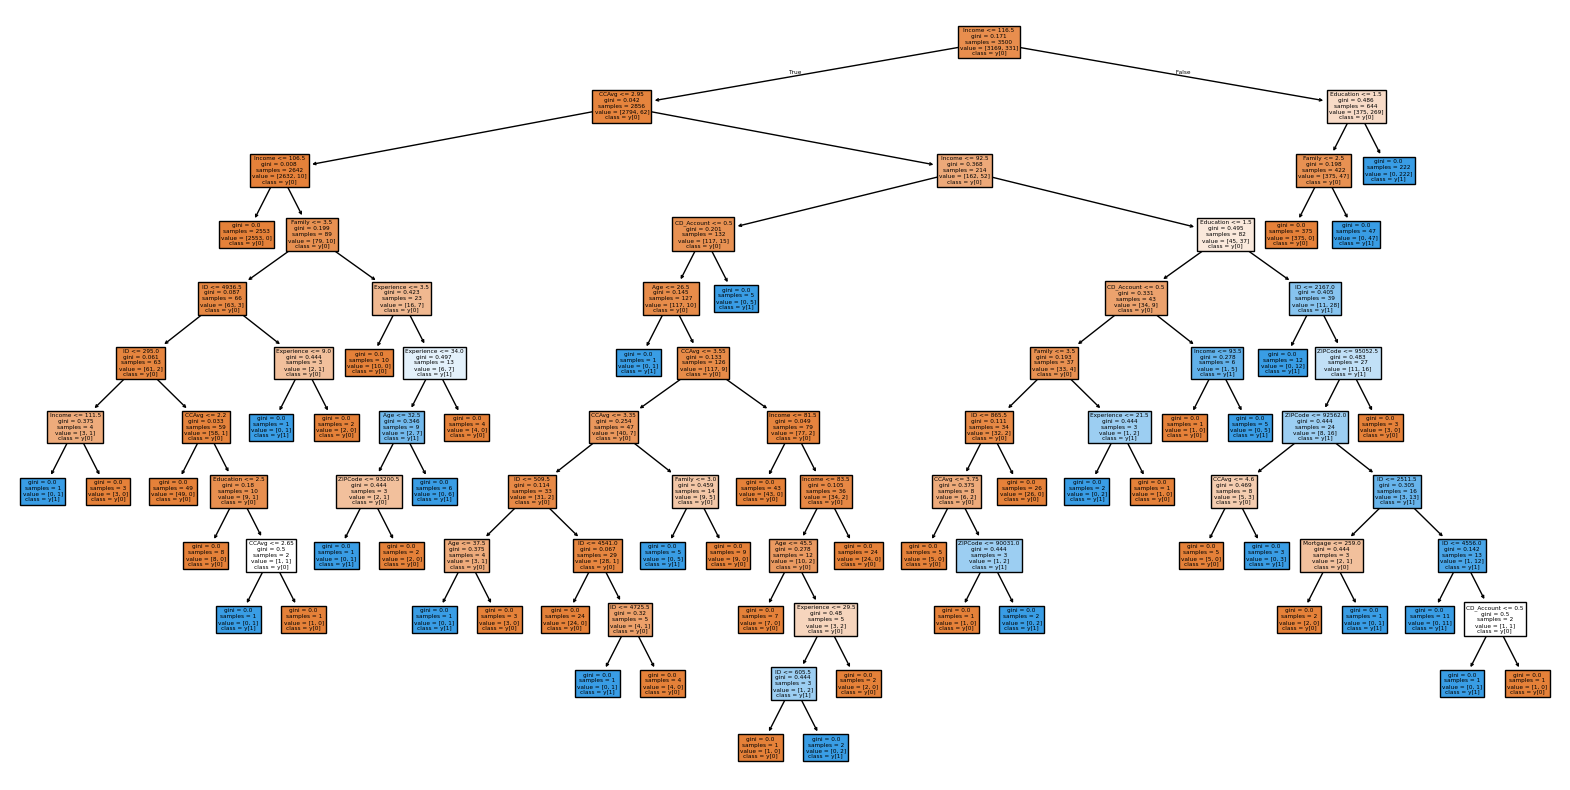

In [ ]:
#Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(base_model, feature_names=X_train.columns, class_names=True, filled=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(base_model, feature_names=list(X_train.columns), show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ID <= 295.00
|   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Income >  111.50
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |--- ID >  295.00
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 2.65
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- 

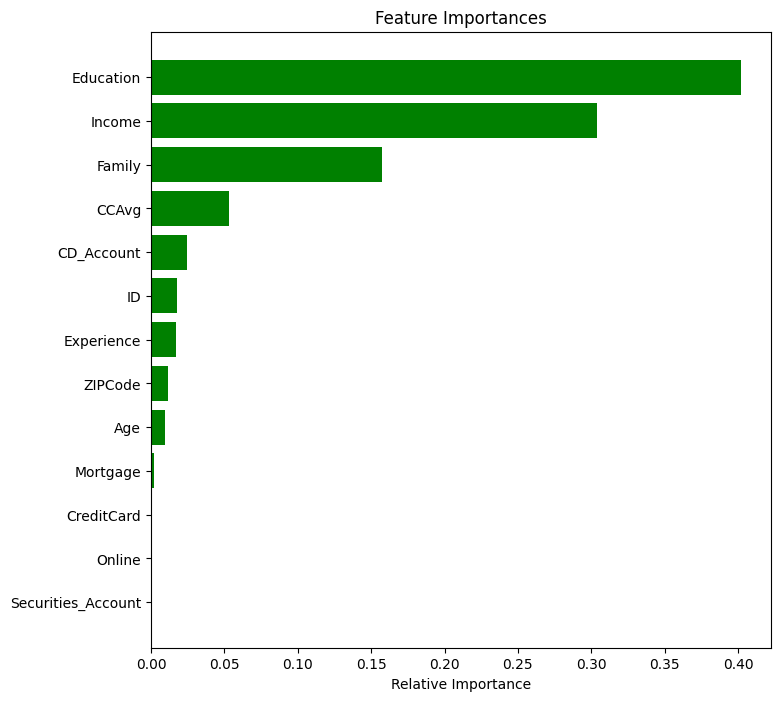

In [ ]:
importances = base_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [list(X_train.columns)[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. Overall, the default model performed really well, with an accuracy of ~98% on training data.
2. On Class 0, where customers did not opt to the personal loan program, the model predicted them 99%. On Class 1, the model was able to identify 90% of the time a customer would sign up for a personal loan correctly.
3. The model is successful at both identifying the positive class correctly and minimizing the false positives and false negatives, especially considering class imbalance.

**Important Features:**
1. Based on the tree, higher imcome (more than 116.5k USD) and higher education lead to the most conversions.
2. Higher income, with lower education but higher family size, also lead to more conversions.
3. For lower income (less 116.5k USD), some success with conversions was observed with a combination of CC Spending, family size, and education.

## Model Performance Improvement

#Pre-pruning

In [ ]:
#Prepruning with sample parameters
pruned_model1 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50,
    min_samples_leaf=10,
    max_leaf_nodes = 20,
    random_state=1)

pruned_model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10,
                       min_samples_split=50, random_state=1)

In [ ]:
#Running pruned model w/ Test Data
y_pred = pruned_model.predict(X_test)

In [ ]:
#Evlauating Accuracy w/ Test Data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.98


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1344    7]
 [  23  126]]


In [ ]:
#Precision, Recall, and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.95      0.85      0.89       149

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



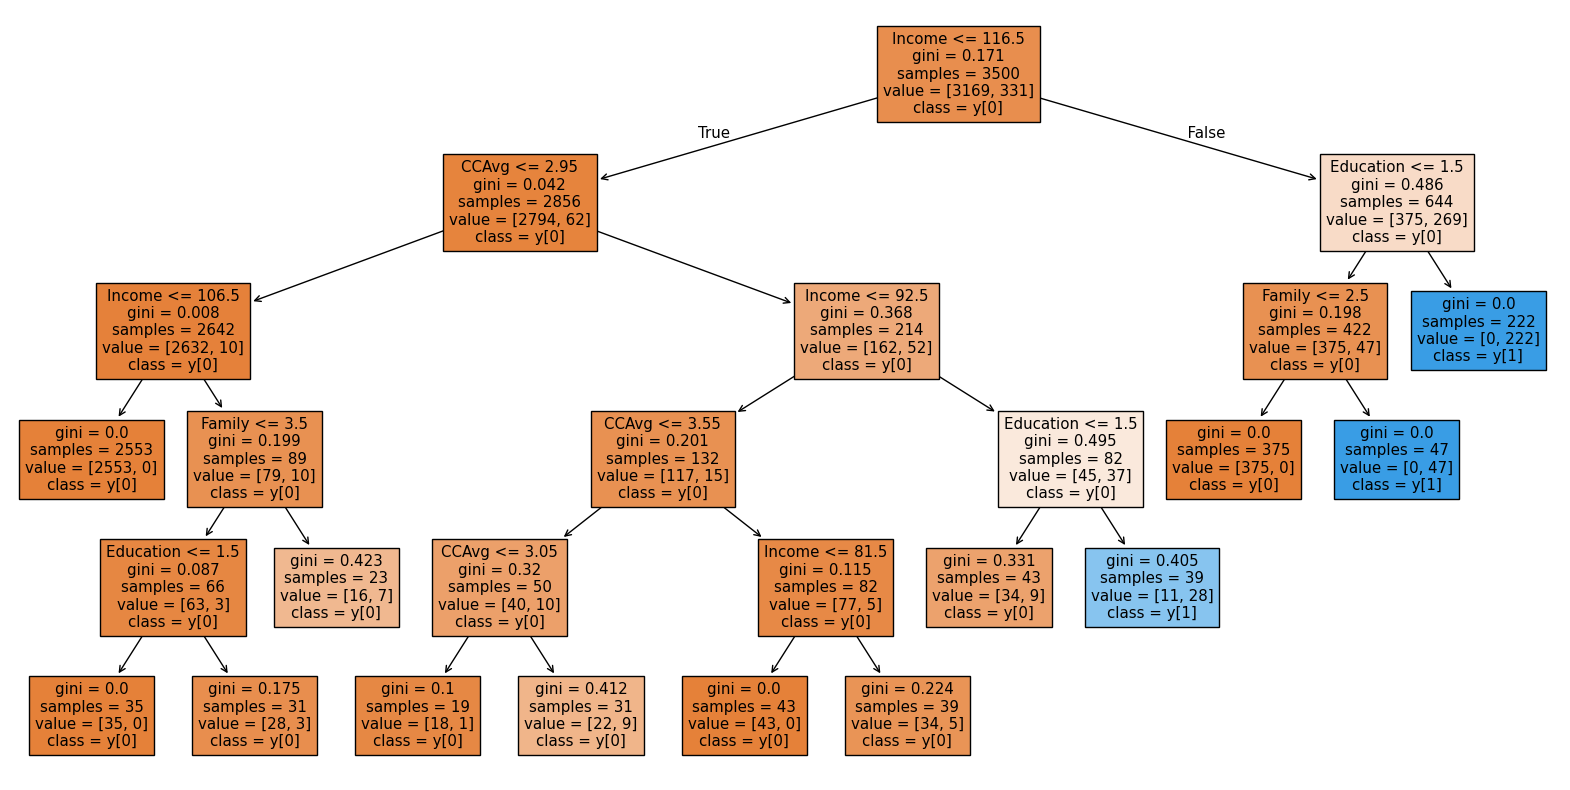

In [ ]:
#Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(pruned_model, feature_names=X_train.columns, class_names=True, filled=True)
plt.show()

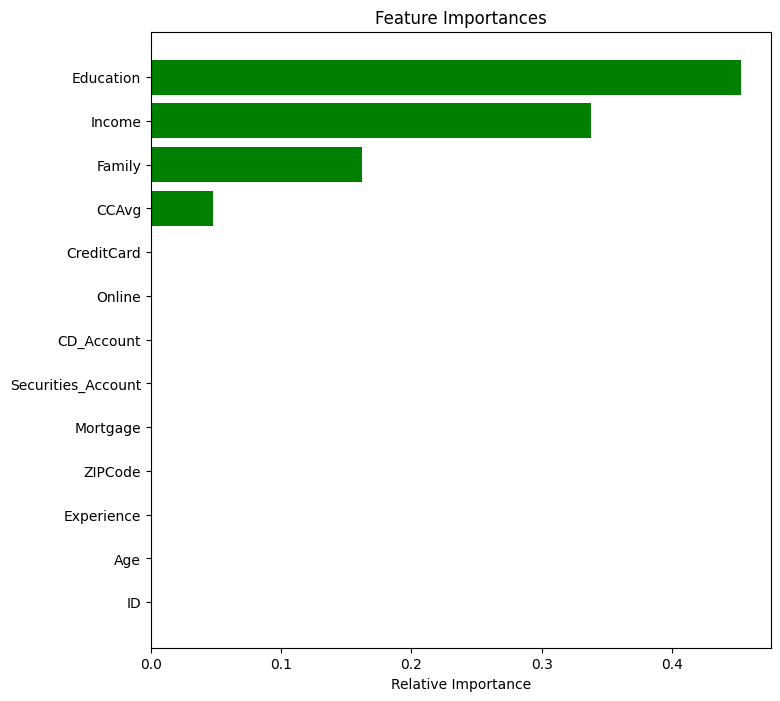

In [ ]:
importances = pruned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [list(X_train.columns)[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**:

1. While the pre-puned model had similar accuracy, it has higher precision (0.95 vs 0.90) but lower recall (0.85 vs 0.90) for identifying customers who would sign up for the personal loan campaign compared to the base model.
2. As expected, pre-pruning by managing max depth and sample size lead to a  simpler tree.
3. As a result of the simpler tree, you'd also notice no importance to features such as CC spending or experience.

#Post pruning

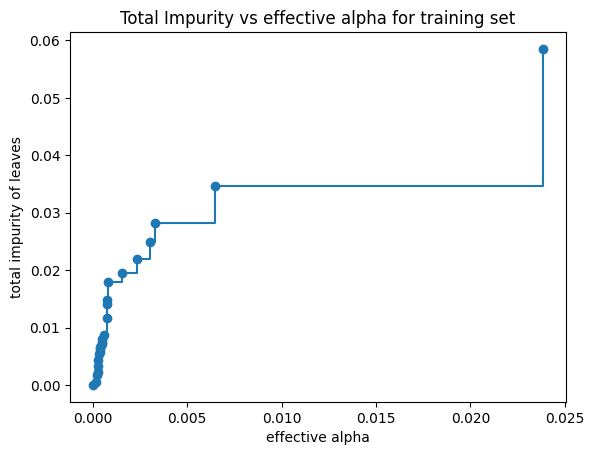

In [ ]:
#Getting the cost complexity pruning path for the base model
path = base_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the total impurities vs effective alphas
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observation:** Based on the above graph, setting an alpha value of 0.008.

In [ ]:
#Creating a post-pruning model w/ ccp_alpha = 0.008
post_pruned_model = DecisionTreeClassifier(random_state=1, ccp_alpha=0.008)
post_pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.008, random_state=1)

In [ ]:
#Running pruned model w/ Test Data
y_pred = post_pruned_model.predict(X_test)

In [ ]:
#Evlauating Accuracy w/ Test Data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9753333333333334


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1351    0]
 [  37  112]]


In [ ]:
#Precision, Recall, and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1351
           1       1.00      0.75      0.86       149

    accuracy                           0.98      1500
   macro avg       0.99      0.88      0.92      1500
weighted avg       0.98      0.98      0.97      1500



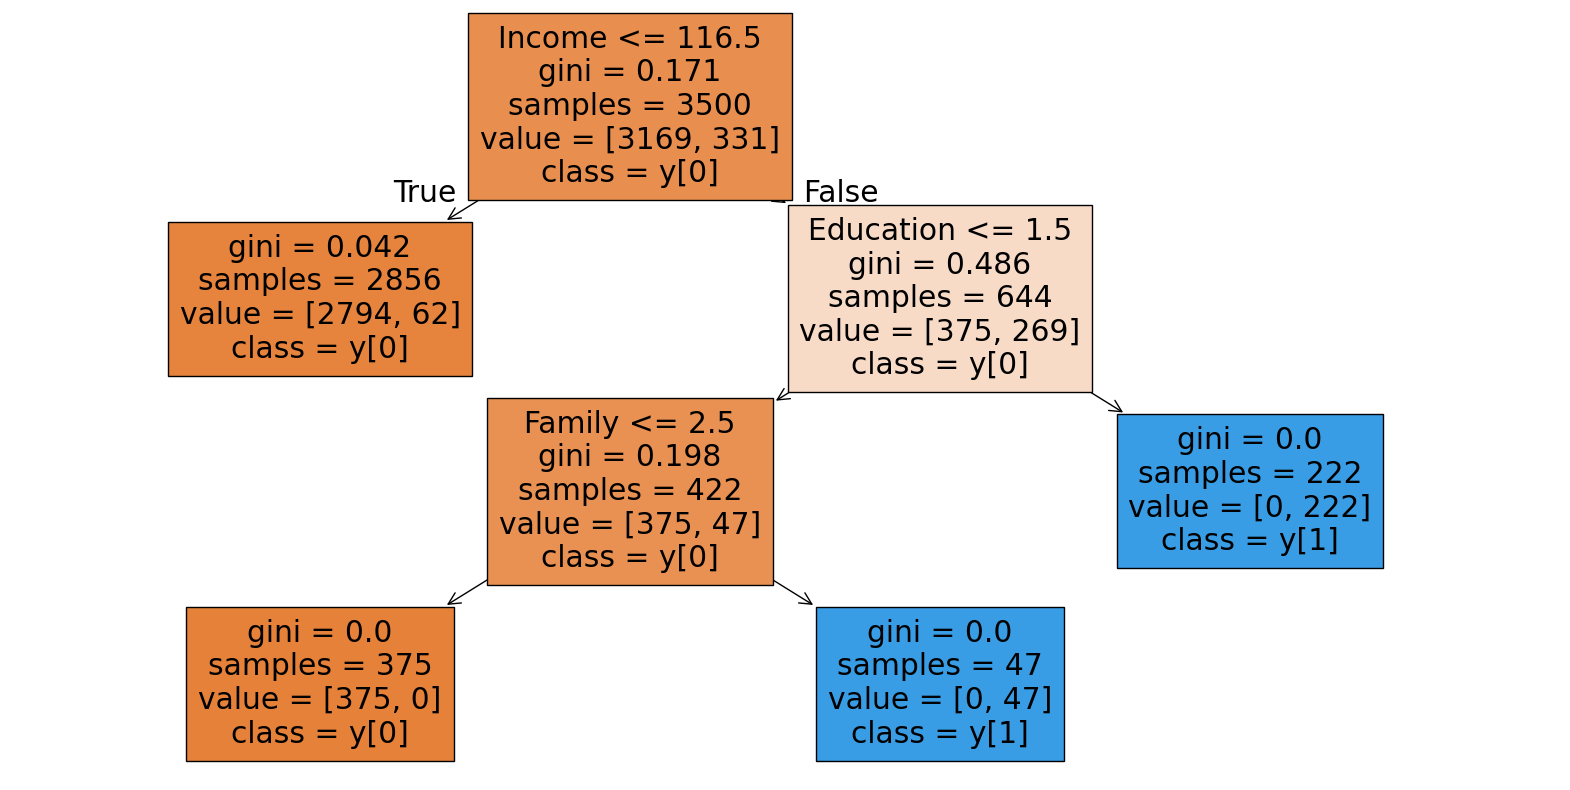

In [ ]:
#Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(post_pruned_model, feature_names=X_train.columns, class_names=True, filled=True)
plt.show()

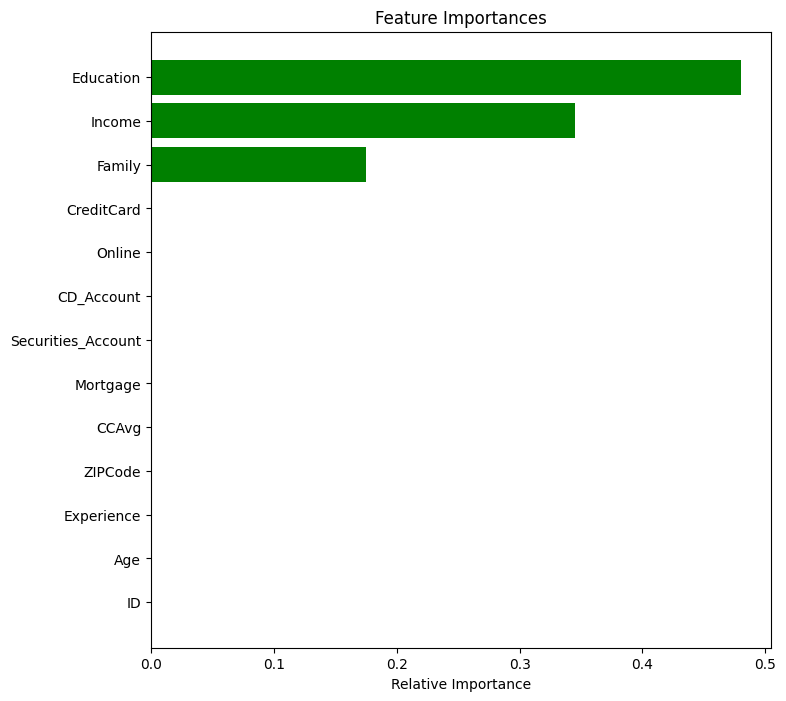

In [ ]:
importances = post_pruned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [list(X_train.columns)[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1.While the post-puned model had similar accuracy (0.98), it has higher precision (1 vs 0.95 vs 0.90) but lower recall (0.75 vs 0.85 vs 0.90) for identifying customers who would sign up for the personal loan campaign compared to the pre-pruned and base model respectively.
2. As expected, post-pruning lead to the simplest tree yet.
3. As a result of the simpler tree, you'd also notice all decisions based on only 3 features - income, education, and family size.

## Model Performance Comparison and Final Model Selection

**Observations:**




**First Model (Default Tree - base_model):**

Class 1 Precision: 0.90

Class 1 Recall: 0.89

F1-Score for Class 1: 0.90

**Comments:**
1. High recall, good precision, and best F1 score of the different models.
2. Good for campaigns looking to maximize the outreach knowing that some potentially non-interested customers would be targetted.





**Second Model (Pre-pruned):**

Class 1 Precision: 0.95

Class 1 Recall: 0.85

F1-Score for Class 1: 0.89

**Comments:**
1. Reasonable recall, better precision, and slightly lower F1 score than default model.
2. Better than base model when it comes to conversion of campaign, but at the risk of missing out on more potential customers who might have signed up for a personal loan.
3. From a computational cost standpoint, cheaper to execute.




**Third Model (Post Pruning - ccp_alpha = 0.008):**

Class 1 Precision: 1.00

Class 1 Recall: 0.75

F1-Score for Class 1: 0.86

**Comments:**
1. Lowest recall,, great precision, and lowest F1 score.
2. Best model if the cost of campaign/risk is high, as this model has a precision of 1.0 of finding customers. However, this model would target the fewest number of customers, and we would misss out on potential customers.
3. From a computational cost standpoint, cheapest to execute with its very simple tree.




**Final Model Selection:**

Business goal - *the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans*

While this goal is specified, the cost of running the campaign per customer is not available, the following recommendations can be made:

1. **Cost of campaign is not singificant:** - In this case, recommend the **base_model** as it targets the most possible customers, and still ensures a very high conversion rate (~90%).

2. **Cost of campaign is significant:** In this case, recommend the **post_pruned_model** as it has stellar precision in identifying customers that would convert.

PS: A middle ground could be the **pruned_model** is a nice balance between the two.


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Customer Segments:**

1. High Income Educated Individuals - 116.5k or more.

*   Sub-segment 1 - Customers with advanced degrees. Most successful sub-segment of customers.
*  Sub-segment 2 - Customers with larger family size (3 or more).
* **Recomendation:** Develop strong relations with this customer cohort as they are most likely to take advantage of the personal loan products.


2. Moderate income ( less than 116.5k but more than 92.5k),  younger professionsals (less than 32.5 years), credit card spending (2.95k USD)


*   Some combination of these parameters showed very low conversion, but only other cohort that maybe worth thinking about as future banking products are being developed.
* **Recomendation:** Consider running survery and/or customer research to understand if alternate financial loan products could drive more conversions to asset customers.


**Campaign:**
As a data science team, we have developed a few models that can be used to more accurately target customers for personal loan products. Based on the need to expand rapidly and assuming campaign costs are not significant, we recommend **base_model** based targetting. We expect this model to have conversions around 90%.

Further, if you wish to perform very targetted outreach to a subset of these customers who may have missed the online campaign, we have developed a higher accuracy model ( **post_pruned_model** ) that can be used for more personal but expensive outreach to drive faster conversions.

**Deployment and Monitoring:**
Considering the sample size of data provided (~5000), we additionally recommend the following:

1. Continous Monitoring and fine tuning - Once the campaign is underway, we recommend monitoring conversion rates and tweaking the model further to further improve targetting.

2. Addtional Data Points - Considering the customer cohorts are identified specifically by very few data points, consider collecting additional information from customers income drivers (e.g. source(s), occupation, seasonality), education (e.g. type of degree), and family (e.g. ages of family) to understand if there are additional data points. (e.g. young high earning self employed family with smaller/older children might have a higher interest in personal loans).

3. A/B Testing - Considering this campaign is going to be more targetted based on M/L outputs instead of a broad outreach, consdering A/B testing of messasing and targetting strategies.



In [ ]:
#Convert to html

%%shell
jupyter nbconvert --to html /content/Project_2_ML_AllLife_Bank_Karthik_Garimella.ipynb

[NbConvertApp] Converting notebook /content/Project_2_ML_AllLife_Bank_Karthik_Garimella.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 33 image(s).
[NbConvertApp] Writing 3590105 bytes to /content/Project_2_ML_AllLife_Bank_Karthik_Garimella.html
